Saving Machine Learning Week1 Project Data.pdf to Machine Learning Week1 Project Data.pdf
Dataset Preview:
      T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
1   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
3   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
5   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
7   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
9  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

Model Evaluation:
Mean Absolute Error: 42.56750619348557
Mean Squared Error: 3215.5806997676195
R² Score: 0.48658018156079563


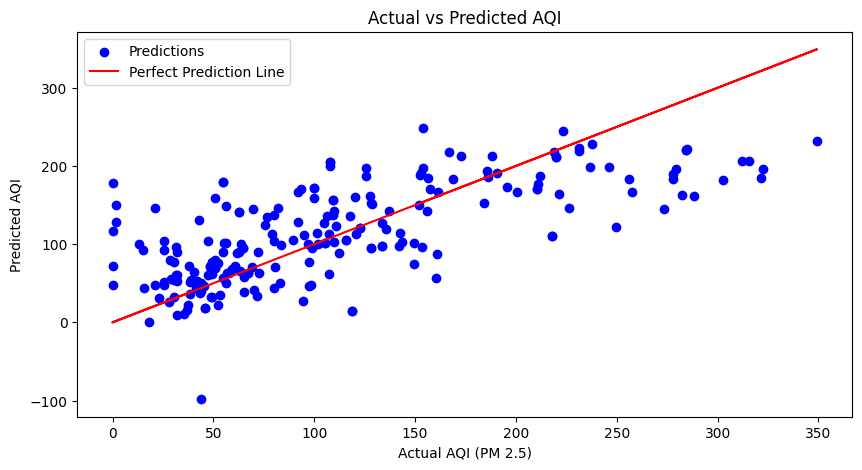


Predicted AQI for the given input: 222.20873975200217


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [2]:
# Step 1: Install Necessary Libraries
!pip install pdfplumber

# Step 2: Import Libraries
import pdfplumber
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 3: Upload and Extract Data from PDF
from google.colab import files
uploaded = files.upload()

file_path = list(uploaded.keys())[0]

with pdfplumber.open(file_path) as pdf:
    tables = [pdf.pages[i].extract_table() for i in range(len(pdf.pages))]

# Convert extracted data into DataFrame
data_list = [item for table in tables for item in table if item]
df = pd.DataFrame(data_list[1:], columns=data_list[0])

# Step 4: Data Preprocessing
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Step 5: Define Features and Target Variable
X = df.drop(columns=['PM 2.5'])  # Independent variables
y = df['PM 2.5']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Step 8: Visualizing the Predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction Line')
plt.xlabel("Actual AQI (PM 2.5)")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.legend()
plt.show()

# Step 9: Predict AQI for New Data (Example)
new_data = np.array([[7.4, 9.8, 4.8, 1017.6, 93.0, 0.5, 4.3, 9.4]])
predicted_aqi = model.predict(new_data)
print(f"\nPredicted AQI for the given input: {predicted_aqi[0]}")